# Exemplo Simples de KNN em Python

Este notebook apresenta duas formas de implementar o algoritmo KNN (K-Nearest Neighbors):
- Uma implementação manual, sem bibliotecas externas
- Uma implementação utilizando o scikit-learn

O objetivo é classificar um novo ponto com base nos vizinhos mais próximos em um conjunto de dados simples.

## Implementação Manual de KNN

In [1]:
# Dados de treinamento: cada ponto possui duas características e uma classe
dados = [
    ([1, 2], 'A'),
    ([2, 3], 'A'),
    ([3, 3], 'B'),
    ([6, 5], 'B'),
    ([7, 8], 'B'),
    ([8, 8], 'A')
]

def distancia(p1, p2):
    # Calcula a distância Euclidiana entre dois pontos
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2) ** 0.5

def knn(novo_ponto, k=3):
    distancias = []
    for ponto, classe in dados:
        d = distancia(novo_ponto, ponto)
        distancias.append((d, classe))
    distancias.sort()
    vizinhos = distancias[:k]
    contagem = {}
    for _, classe in vizinhos:
        contagem[classe] = contagem.get(classe, 0) + 1
    return max(contagem, key=contagem.get)

# Exemplo de uso
novo = [5, 5]
classe_prevista = knn(novo, k=3)
print(f'O novo ponto {novo} foi classificado como: {classe_prevista}')

O novo ponto [5, 5] foi classificado como: B


## Implementação de KNN com scikit-learn

In [2]:
from sklearn.neighbors import KNeighborsClassifier

X = [
    [1, 2],
    [2, 3],
    [3, 3],
    [6, 5],
    [7, 8],
    [8, 8]
]
y = ['A', 'A', 'B', 'B', 'B', 'A']

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

novo_ponto = [[5, 5]]
classe_prevista = knn.predict(novo_ponto)
print(f'O novo ponto {novo_ponto[0]} foi classificado como: {classe_prevista[0]}')

O novo ponto [5, 5] foi classificado como: B


## Visualização dos dados em 2D
Vamos plotar os pontos do conjunto de dados, colorindo cada classe com uma cor diferente.

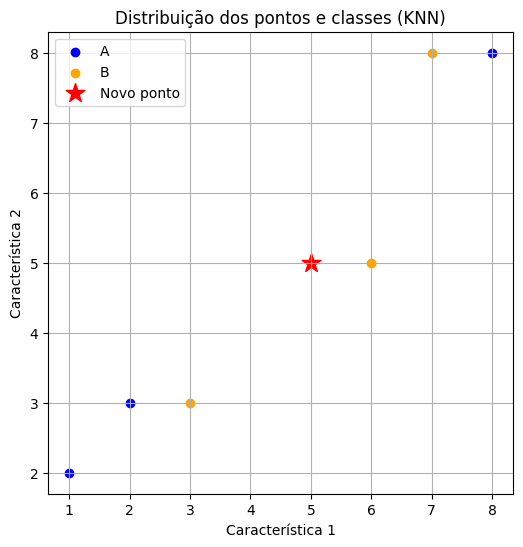

In [3]:
import matplotlib.pyplot as plt

# Dados para plotar (usando os mesmos dados das células anteriores)
X_plot = [
    [1, 2],
    [2, 3],
    [3, 3],
    [6, 5],
    [7, 8],
    [8, 8]
]
y_plot = ['A', 'A', 'B', 'B', 'B', 'A']

cores = {'A': 'blue', 'B': 'orange'}

plt.figure(figsize=(6, 6))
for ponto, classe in zip(X_plot, y_plot):
    plt.scatter(ponto[0], ponto[1], color=cores[classe], label=classe)

# Adiciona o novo ponto classificado
plt.scatter(5, 5, color='red', marker='*', s=200, label='Novo ponto')

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Distribuição dos pontos e classes (KNN)')
# Evita duplicação de legendas
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.grid(True)
plt.show()